##Run Classifier

In [15]:
% matplotlib qt

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import exec.model_framework.model as mdl
from utils.utilgen import viewdf

% reload_ext autoreload
% autoreload 2


###Data

In [2]:
dataPath = os.path.join('data', 'data_derived', 'train1c.csv')
data = pd.read_csv(dataPath)
dataTPath = os.path.join('data', 'data_derived', 'train2c.csv')
dataT = pd.read_csv(dataTPath)
display(data.sample(n=5))
display(dataT.sample(n=5))


,Survived,Pclass,Age,Fare,EmbarkedC,EmbarkedS,Female,SibSpYes,ParchYes
372,1,3,29.812625,16.1000,0,1,1,1,0
115,0,3,18.000000,14.4542,1,0,1,0,1
174,1,3,25.000000,7.7750,0,1,0,1,0
363,1,1,24.000000,49.5042,1,0,1,0,0
594,1,1,27.000000,30.5000,0,1,0,0,0


,Survived,Pclass,Age,Fare,EmbarkedC,EmbarkedS,Female,SibSpYes,ParchYes
201,1,1,29.000000,165.675856,0,1,1,0,0
67,0,3,24.000000,7.050000,0,1,0,0,0
62,0,3,29.435674,69.550000,0,1,0,1,1
128,1,1,36.000000,120.000000,0,1,1,1,1
140,1,2,29.000000,26.000000,0,1,1,1,0


###Logistic

In [16]:
modelLR = mdl.Logistic(fit_intercept=False, scale=True, C=10)
modelLR.fit(data)
modelLR.predict(dataT)
modelLR.printSummary()
modelLR.plotROC()


****** LOGISTIC ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41

-----Coefficients-----
Pclass      -0.79
Age         -0.42
Fare         0.06
EmbarkedC    0.00
EmbarkedS   -0.10
Female       1.29
SibSpYes    -0.02
ParchYes    -0.02
dtype: float64

-----Performance-----
accuracy	 (IS / CV / OOS): 0.78 / 0.78 / 0.79
accproba	 (IS / CV / OOS): 0.68 / 0.68 / 0.69
logproba	 (IS / CV / OOS): -0.49 / -0.50 / -0.49
aucproba	 (IS / CV / OOS): 0.85 / 0.85 / 0.85
recall	 (IS / CV / OOS): 0.79 / 0.78 / 0.81
precision	 (IS / CV / OOS): 0.68 / 0.67 / 0.72

-----Confusion (IS)-----
   0-pred  1-pred
0    0.49    0.14
1    0.08    0.29
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.46    0.13
1    0.08    0.33



###Logistic Ridge

In [17]:
modelLRRidgeCV = mdl.LogisticRidgeCV(fit_intercept=False, scale=True, Cs=np.exp(np.arange(-5, 6, 1)))
modelLRRidgeCV.fit(data)
modelLRRidgeCV.predict(dataT)
modelLRRidgeCV.printSummary()
modelLRRidgeCV.plotROC()

****** LOGISTIC RIDGE ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41

-----Coefficients-----
Pclass      -0.74
Age         -0.39
Fare         0.08
EmbarkedC    0.01
EmbarkedS   -0.09
Female       1.24
SibSpYes    -0.02
ParchYes    -0.01
dtype: float64

-----Ridge CV multiplier-----
Ridge Multiplier = 0.37



-----Performance-----
accuracy	 (IS / CV / OOS): 0.78 / 0.78 / 0.79
accproba	 (IS / CV / OOS): 0.68 / 0.68 / 0.68
logproba	 (IS / CV / OOS): -0.49 / -0.50 / -0.49
aucproba	 (IS / CV / OOS): 0.85 / 0.85 / 0.85
recall	 (IS / CV / OOS): 0.79 / 0.78 / 0.81
precision	 (IS / CV / OOS): 0.68 / 0.68 / 0.72

-----Confusion (IS)-----
   0-pred  1-pred
0    0.49    0.14
1    0.08    0.29
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.46    0.13
1    0.08    0.33



###Logistic Best Subset

In [18]:
modelLRBestK = mdl.LogisticBestSubset(fit_intercept=False, scale=True, k=5)
modelLRBestK.fit(data)
modelLRBestK.predict(dataT)
modelLRBestK.printSummary()
modelLRBestK.plotROC()

****** LOGISTIC KBEST ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41

-----Coefficients-----
Pclass      -0.59
Fare         0.09
EmbarkedC    0.08
Female       1.27
ParchYes     0.07
dtype: float64

-----Performance-----
accuracy	 (IS / CV / OOS): 0.77 / 0.76 / 0.77
accproba	 (IS / CV / OOS): 0.67 / 0.67 / 0.68
logproba	 (IS / CV / OOS): -0.50 / -0.51 / -0.50
aucproba	 (IS / CV / OOS): 0.84 / 0.84 / 0.84
recall	 (IS / CV / OOS): 0.75 / 0.75 / 0.76
precision	 (IS / CV / OOS): 0.67 / 0.66 / 0.70

-----Confusion (IS)-----
   0-pred  1-pred
0    0.49    0.13
1    0.09    0.28
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.46    0.13
1    0.10    0.31



###Logistic GAM

In [19]:
modelGAM = mdl.LogisticGAM(scale=True, fit_intercept=False, n_splines=15, lam=5)
modelGAM.fit(data)
modelGAM.predict(dataT)
modelGAM.printSummary()
modelGAM.plotROC()
modelGAM.plotFeatureFit()

****** LOGISTIC GAM ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41

-----Statistics-----
Feature Function   Data Type      Num Splines   Spline Order  Linear Fit  Lambda     P > x      Sig. Code 
================== ============== ============= ============= =========== ========== ========== ==========
Pclass_________    numerical      15            3             False       5.0        1.61e-04   ***       
Age____________    numerical      15            3             False       5.0        3.16e-03   **        
Fare___________    numerical      15            3             False       5.0        3.09e-02   *         
EmbarkedC______    numerical      15            3             False       5.0        1.00e+00             
EmbarkedS______    numerical      15            3             False       5.0        7.28e-01             
Female_________    numerical      15            3             False       5.0        0.00e+

-----Performance-----
accuracy	 (IS / CV / OOS): 0.82 / 0.80 / 0.78
accproba	 (IS / CV / OOS): 0.72 / 0.72 / 0.72
logproba	 (IS / CV / OOS): -0.43 / -0.46 / -0.46
aucproba	 (IS / CV / OOS): 0.86 / 0.85 / 0.85
recall	 (IS / CV / OOS): 0.70 / 0.71 / 0.72
precision	 (IS / CV / OOS): 0.78 / 0.76 / 0.74

-----Confusion (IS)-----
   0-pred  1-pred
0    0.55    0.07
1    0.11    0.26
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.49    0.10
1    0.11    0.29



### Logistic Bayes

In [21]:
model = mdl._LogisticBayesianSklearn(featuresSd=10, nsamplesFit=200, nsamplesPredict=100)
model.fit(X=data[['Age', 'Female']], y=data['Survived'])
model.predict(X=dataT[['Age', 'Female']])

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


/usr/local/lib/python3.5/dist-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):


Sequential sampling (2 chains in 1 job)


NUTS: [dd_beta]


  0%|          | 0/700 [00:00<?, ?it/s]

  2%|▏         | 11/700 [00:00<00:07, 86.22it/s]

  2%|▏         | 14/700 [00:00<00:30, 22.42it/s]

  2%|▏         | 17/700 [00:01<01:55,  5.91it/s]

  3%|▎         | 19/700 [00:02<01:49,  6.24it/s]

  3%|▎         | 21/700 [00:02<01:59,  5.70it/s]

  3%|▎         | 23/700 [00:03<02:26,  4.61it/s]

  3%|▎         | 24/700 [00:03<02:11,  5.13it/s]

  4%|▎         | 26/700 [00:03<02:35,  4.33it/s]

  4%|▍         | 27/700 [00:04<03:40,  3.05it/s]

  4%|▍         | 28/700 [00:05<04:26,  2.52it/s]

  4%|▍         | 29/700 [00:05<04:57,  2.25it/s]

  4%|▍         | 30/700 [00:06<05:18,  2.10it/s]

  4%|▍         | 31/700 [00:06<05:33,  2.01it/s]

  5%|▍         | 32/700 [00:07<05:42,  1.95it/s]

  5%|▍         | 33/700 [00:07<05:48,  1.91it/s]

  5%|▍         | 34/700 [00:08<05:53,  1.88it/s]

  5%|▌         | 35/700 [00:08<06:00,  1.84it/s]

  5%|▌         | 36/700 [00:09<06:01,  1.84it/s]

  5%|▌         | 37/700 [00:10<06:04,  1.82it/s]

  5%|▌         | 38/700 [00:10<06:04,  1.82it/s]

  6%|▌         | 39/700 [00:11<06:07,  1.80it/s]

  6%|▌         | 40/700 [00:11<06:09,  1.79it/s]

  6%|▌         | 41/700 [00:12<06:08,  1.79it/s]

  6%|▌         | 42/700 [00:12<06:06,  1.80it/s]

  6%|▌         | 43/700 [00:13<06:05,  1.80it/s]

  6%|▋         | 44/700 [00:13<06:02,  1.81it/s]

  6%|▋         | 45/700 [00:14<06:01,  1.81it/s]

  7%|▋         | 46/700 [00:15<06:00,  1.81it/s]

  7%|▋         | 47/700 [00:15<05:59,  1.82it/s]

  7%|▋         | 48/700 [00:16<05:58,  1.82it/s]

  7%|▋         | 49/700 [00:16<05:57,  1.82it/s]

  7%|▋         | 50/700 [00:17<05:57,  1.82it/s]

  7%|▋         | 51/700 [00:17<05:56,  1.82it/s]

  7%|▋         | 52/700 [00:18<05:55,  1.82it/s]

  8%|▊         | 53/700 [00:18<05:55,  1.82it/s]

  8%|▊         | 54/700 [00:19<05:54,  1.82it/s]

  8%|▊         | 55/700 [00:19<05:53,  1.82it/s]

  8%|▊         | 56/700 [00:20<05:53,  1.82it/s]

  8%|▊         | 57/700 [00:21<05:52,  1.82it/s]

  8%|▊         | 58/700 [00:21<04:59,  2.14it/s]

  8%|▊         | 59/700 [00:21<05:14,  2.04it/s]

  9%|▊         | 60/700 [00:22<05:25,  1.97it/s]

  9%|▊         | 61/700 [00:23<05:33,  1.92it/s]

  9%|▉         | 62/700 [00:23<05:39,  1.88it/s]

  9%|▉         | 63/700 [00:24<05:42,  1.86it/s]

  9%|▉         | 64/700 [00:24<05:44,  1.85it/s]

  9%|▉         | 65/700 [00:25<05:45,  1.84it/s]

  9%|▉         | 66/700 [00:25<05:45,  1.83it/s]

 10%|▉         | 67/700 [00:26<05:45,  1.83it/s]

 10%|▉         | 68/700 [00:26<05:45,  1.83it/s]

 10%|▉         | 69/700 [00:27<05:45,  1.83it/s]

 10%|█         | 70/700 [00:27<05:45,  1.83it/s]

 10%|█         | 71/700 [00:28<05:44,  1.83it/s]

 10%|█         | 72/700 [00:29<05:44,  1.82it/s]

 10%|█         | 73/700 [00:29<05:44,  1.82it/s]

 11%|█         | 74/700 [00:30<05:43,  1.82it/s]

 11%|█         | 75/700 [00:30<04:52,  2.14it/s]

 11%|█         | 76/700 [00:30<04:42,  2.21it/s]

 11%|█         | 77/700 [00:31<04:59,  2.08it/s]

 11%|█         | 78/700 [00:31<05:12,  1.99it/s]

 11%|█▏        | 79/700 [00:32<05:01,  2.06it/s]

 11%|█▏        | 80/700 [00:32<05:14,  1.97it/s]

 12%|█▏        | 81/700 [00:33<05:25,  1.90it/s]

 12%|█▏        | 82/700 [00:34<05:31,  1.86it/s]

 12%|█▏        | 83/700 [00:34<04:43,  2.18it/s]

 12%|█▏        | 85/700 [00:34<03:37,  2.83it/s]

 12%|█▏        | 86/700 [00:35<04:13,  2.42it/s]

 12%|█▏        | 87/700 [00:35<04:38,  2.20it/s]

 13%|█▎        | 88/700 [00:36<04:54,  2.08it/s]

 13%|█▎        | 89/700 [00:36<05:07,  1.98it/s]

 13%|█▎        | 90/700 [00:37<05:15,  1.93it/s]

 13%|█▎        | 91/700 [00:37<05:21,  1.90it/s]

 13%|█▎        | 92/700 [00:38<04:10,  2.43it/s]

 13%|█▎        | 93/700 [00:38<04:35,  2.21it/s]

 13%|█▎        | 94/700 [00:39<04:52,  2.07it/s]

 14%|█▎        | 95/700 [00:39<05:04,  1.99it/s]

 14%|█▎        | 96/700 [00:40<05:12,  1.94it/s]

 14%|█▍        | 97/700 [00:40<05:18,  1.90it/s]

 14%|█▍        | 98/700 [00:41<05:21,  1.87it/s]

 14%|█▍        | 99/700 [00:41<05:23,  1.86it/s]

 14%|█▍        | 100/700 [00:42<05:25,  1.84it/s]

 14%|█▍        | 101/700 [00:42<05:26,  1.84it/s]

 15%|█▍        | 102/700 [00:43<05:26,  1.83it/s]

 15%|█▍        | 103/700 [00:44<05:26,  1.83it/s]

 15%|█▍        | 104/700 [00:44<05:26,  1.82it/s]

 15%|█▌        | 105/700 [00:45<05:26,  1.82it/s]

 15%|█▌        | 106/700 [00:45<05:25,  1.82it/s]

 15%|█▌        | 107/700 [00:46<05:25,  1.82it/s]

 15%|█▌        | 108/700 [00:46<05:25,  1.82it/s]

 16%|█▌        | 109/700 [00:47<05:25,  1.82it/s]

 16%|█▌        | 110/700 [00:47<05:24,  1.82it/s]

 16%|█▌        | 111/700 [00:48<05:23,  1.82it/s]

 16%|█▌        | 112/700 [00:49<05:25,  1.81it/s]

 16%|█▌        | 113/700 [00:49<05:24,  1.81it/s]

 16%|█▋        | 114/700 [00:50<05:23,  1.81it/s]

 16%|█▋        | 115/700 [00:50<05:22,  1.81it/s]

 17%|█▋        | 116/700 [00:51<05:21,  1.81it/s]

 17%|█▋        | 117/700 [00:51<05:21,  1.81it/s]

 17%|█▋        | 118/700 [00:52<05:20,  1.81it/s]

 17%|█▋        | 119/700 [00:52<05:20,  1.81it/s]

 17%|█▋        | 120/700 [00:53<05:20,  1.81it/s]

 17%|█▋        | 121/700 [00:54<05:18,  1.82it/s]

 17%|█▋        | 122/700 [00:54<05:18,  1.82it/s]

 18%|█▊        | 123/700 [00:55<05:18,  1.81it/s]

 18%|█▊        | 124/700 [00:55<05:18,  1.81it/s]

 18%|█▊        | 125/700 [00:56<05:17,  1.81it/s]

 18%|█▊        | 126/700 [00:56<05:16,  1.81it/s]

 18%|█▊        | 127/700 [00:57<05:15,  1.81it/s]

 18%|█▊        | 128/700 [00:57<05:15,  1.81it/s]

 18%|█▊        | 129/700 [00:58<05:14,  1.81it/s]

 19%|█▊        | 130/700 [00:58<05:13,  1.82it/s]

 19%|█▊        | 131/700 [00:59<05:14,  1.81it/s]

 19%|█▉        | 132/700 [01:00<05:15,  1.80it/s]

 19%|█▉        | 133/700 [01:00<05:23,  1.75it/s]

 19%|█▉        | 134/700 [01:01<05:28,  1.72it/s]

 19%|█▉        | 135/700 [01:01<05:26,  1.73it/s]

 19%|█▉        | 136/700 [01:02<05:26,  1.73it/s]

 20%|█▉        | 137/700 [01:03<05:22,  1.75it/s]

 20%|█▉        | 138/700 [01:03<05:23,  1.74it/s]

 20%|█▉        | 139/700 [01:04<05:19,  1.75it/s]

 20%|██        | 140/700 [01:04<05:16,  1.77it/s]

 20%|██        | 141/700 [01:05<05:13,  1.78it/s]

 20%|██        | 142/700 [01:05<05:12,  1.78it/s]

 20%|██        | 143/700 [01:06<05:11,  1.79it/s]

 21%|██        | 144/700 [01:06<05:10,  1.79it/s]

 21%|██        | 145/700 [01:07<05:10,  1.79it/s]

 21%|██        | 146/700 [01:08<05:08,  1.79it/s]

 21%|██        | 147/700 [01:08<05:07,  1.80it/s]

 21%|██        | 148/700 [01:09<05:06,  1.80it/s]

 21%|██▏       | 149/700 [01:09<05:12,  1.77it/s]

 21%|██▏       | 150/700 [01:10<05:20,  1.72it/s]

 22%|██▏       | 151/700 [01:10<05:28,  1.67it/s]

 22%|██▏       | 152/700 [01:11<05:25,  1.68it/s]

 22%|██▏       | 153/700 [01:12<05:25,  1.68it/s]

 22%|██▏       | 154/700 [01:12<05:27,  1.67it/s]

 22%|██▏       | 155/700 [01:13<05:27,  1.66it/s]

 22%|██▏       | 156/700 [01:13<05:26,  1.66it/s]

 22%|██▏       | 157/700 [01:14<05:19,  1.70it/s]

 23%|██▎       | 158/700 [01:15<05:13,  1.73it/s]

 23%|██▎       | 159/700 [01:15<05:19,  1.69it/s]

 23%|██▎       | 160/700 [01:16<05:17,  1.70it/s]

 23%|██▎       | 161/700 [01:16<05:13,  1.72it/s]

 23%|██▎       | 162/700 [01:17<05:09,  1.74it/s]

 23%|██▎       | 163/700 [01:17<05:07,  1.75it/s]

 23%|██▎       | 164/700 [01:18<05:03,  1.76it/s]

 24%|██▎       | 165/700 [01:19<05:03,  1.76it/s]

 24%|██▎       | 166/700 [01:19<05:05,  1.75it/s]

 24%|██▍       | 167/700 [01:20<05:15,  1.69it/s]

 24%|██▍       | 168/700 [01:20<05:12,  1.70it/s]

 24%|██▍       | 169/700 [01:21<05:08,  1.72it/s]

 24%|██▍       | 170/700 [01:22<05:20,  1.65it/s]

 24%|██▍       | 171/700 [01:22<05:15,  1.68it/s]

 25%|██▍       | 172/700 [01:23<05:07,  1.72it/s]

 25%|██▍       | 173/700 [01:23<05:02,  1.74it/s]

 25%|██▍       | 174/700 [01:24<04:57,  1.77it/s]

 25%|██▌       | 175/700 [01:24<04:55,  1.78it/s]

 25%|██▌       | 176/700 [01:25<04:53,  1.79it/s]

 25%|██▌       | 177/700 [01:26<04:50,  1.80it/s]

 25%|██▌       | 178/700 [01:26<05:00,  1.74it/s]

 26%|██▌       | 179/700 [01:27<05:03,  1.71it/s]

 26%|██▌       | 180/700 [01:27<05:11,  1.67it/s]

 26%|██▌       | 181/700 [01:28<05:19,  1.62it/s]

 26%|██▌       | 182/700 [01:29<05:22,  1.61it/s]

 26%|██▌       | 183/700 [01:29<05:16,  1.64it/s]

 26%|██▋       | 184/700 [01:30<05:09,  1.67it/s]

 26%|██▋       | 185/700 [01:30<05:02,  1.70it/s]

 27%|██▋       | 186/700 [01:31<05:00,  1.71it/s]

 27%|██▋       | 187/700 [01:32<05:04,  1.68it/s]

 27%|██▋       | 188/700 [01:32<05:05,  1.67it/s]

 27%|██▋       | 189/700 [01:33<05:14,  1.63it/s]

 27%|██▋       | 190/700 [01:33<05:04,  1.67it/s]

 27%|██▋       | 191/700 [01:34<04:57,  1.71it/s]

 27%|██▋       | 192/700 [01:35<05:01,  1.69it/s]

 28%|██▊       | 193/700 [01:35<04:55,  1.71it/s]

 28%|██▊       | 194/700 [01:36<04:57,  1.70it/s]

 28%|██▊       | 195/700 [01:36<05:05,  1.65it/s]

 28%|██▊       | 196/700 [01:37<05:03,  1.66it/s]

 28%|██▊       | 197/700 [01:38<05:04,  1.65it/s]

 28%|██▊       | 198/700 [01:38<05:04,  1.65it/s]

 28%|██▊       | 199/700 [01:39<05:06,  1.63it/s]

 29%|██▊       | 200/700 [01:39<05:03,  1.65it/s]

 29%|██▊       | 201/700 [01:41<06:22,  1.30it/s]

 29%|██▉       | 202/700 [01:43<10:01,  1.21s/it]

 29%|██▉       | 203/700 [01:45<12:30,  1.51s/it]

 29%|██▉       | 204/700 [01:46<11:29,  1.39s/it]

 29%|██▉       | 205/700 [01:48<13:28,  1.63s/it]

 29%|██▉       | 206/700 [01:50<14:46,  1.79s/it]

 30%|██▉       | 207/700 [01:52<13:00,  1.58s/it]

 30%|██▉       | 208/700 [01:54<14:25,  1.76s/it]

 30%|██▉       | 209/700 [01:56<15:23,  1.88s/it]

 30%|███       | 210/700 [01:58<16:07,  1.97s/it]

 30%|███       | 211/700 [02:00<16:34,  2.03s/it]

 30%|███       | 212/700 [02:01<14:14,  1.75s/it]

 30%|███       | 213/700 [02:04<15:15,  1.88s/it]

 31%|███       | 214/700 [02:06<16:00,  1.98s/it]

 31%|███       | 215/700 [02:08<16:31,  2.04s/it]

 31%|███       | 216/700 [02:10<16:48,  2.08s/it]

 31%|███       | 217/700 [02:12<17:03,  2.12s/it]

 31%|███       | 218/700 [02:15<17:09,  2.14s/it]

 31%|███▏      | 219/700 [02:17<17:16,  2.15s/it]

 31%|███▏      | 220/700 [02:19<17:17,  2.16s/it]

 32%|███▏      | 221/700 [02:21<17:20,  2.17s/it]

 32%|███▏      | 222/700 [02:23<17:25,  2.19s/it]

 32%|███▏      | 223/700 [02:25<17:19,  2.18s/it]

 32%|███▏      | 224/700 [02:28<17:18,  2.18s/it]

 32%|███▏      | 225/700 [02:30<17:14,  2.18s/it]

 32%|███▏      | 226/700 [02:32<17:11,  2.18s/it]

 32%|███▏      | 227/700 [02:34<17:07,  2.17s/it]

 33%|███▎      | 228/700 [02:36<17:04,  2.17s/it]

 33%|███▎      | 229/700 [02:38<17:02,  2.17s/it]

 33%|███▎      | 230/700 [02:41<17:00,  2.17s/it]

 33%|███▎      | 231/700 [02:43<16:58,  2.17s/it]

 33%|███▎      | 232/700 [02:45<16:55,  2.17s/it]

 33%|███▎      | 233/700 [02:47<16:53,  2.17s/it]

 33%|███▎      | 234/700 [02:49<16:51,  2.17s/it]

 34%|███▎      | 235/700 [02:52<16:49,  2.17s/it]

 34%|███▎      | 236/700 [02:54<16:46,  2.17s/it]

 34%|███▍      | 237/700 [02:56<16:44,  2.17s/it]

 34%|███▍      | 238/700 [02:58<16:41,  2.17s/it]

 34%|███▍      | 239/700 [02:59<14:09,  1.84s/it]

 34%|███▍      | 240/700 [03:01<14:56,  1.95s/it]

 34%|███▍      | 241/700 [03:02<12:56,  1.69s/it]

 35%|███▍      | 242/700 [03:05<14:03,  1.84s/it]

 35%|███▍      | 243/700 [03:07<14:49,  1.95s/it]

 35%|███▍      | 244/700 [03:09<15:18,  2.01s/it]

 35%|███▌      | 245/700 [03:11<15:41,  2.07s/it]

 35%|███▌      | 246/700 [03:13<15:54,  2.10s/it]

 35%|███▌      | 247/700 [03:16<16:06,  2.13s/it]

 35%|███▌      | 248/700 [03:18<16:11,  2.15s/it]

 36%|███▌      | 249/700 [03:20<16:11,  2.15s/it]

 36%|███▌      | 250/700 [03:22<16:10,  2.16s/it]

 36%|███▌      | 251/700 [03:24<16:09,  2.16s/it]

 36%|███▌      | 252/700 [03:25<13:43,  1.84s/it]

 36%|███▌      | 253/700 [03:26<10:48,  1.45s/it]

 36%|███▋      | 254/700 [03:28<12:22,  1.66s/it]

 36%|███▋      | 255/700 [03:28<09:15,  1.25s/it]

 37%|███▋      | 256/700 [03:30<11:16,  1.52s/it]

 37%|███▋      | 257/700 [03:33<12:39,  1.71s/it]

 37%|███▋      | 258/700 [03:34<11:14,  1.53s/it]

 37%|███▋      | 259/700 [03:36<12:37,  1.72s/it]

 37%|███▋      | 260/700 [03:38<13:37,  1.86s/it]

 37%|███▋      | 261/700 [03:40<14:15,  1.95s/it]

 37%|███▋      | 262/700 [03:42<14:42,  2.01s/it]

 38%|███▊      | 263/700 [03:45<15:01,  2.06s/it]

 38%|███▊      | 264/700 [03:47<15:14,  2.10s/it]

 38%|███▊      | 265/700 [03:49<15:24,  2.13s/it]

 38%|███▊      | 266/700 [03:51<15:32,  2.15s/it]

 38%|███▊      | 267/700 [03:53<15:37,  2.17s/it]

 38%|███▊      | 268/700 [03:56<15:38,  2.17s/it]

 38%|███▊      | 269/700 [03:58<15:39,  2.18s/it]

 39%|███▊      | 270/700 [04:00<15:43,  2.19s/it]

 39%|███▊      | 271/700 [04:02<15:41,  2.19s/it]

 39%|███▉      | 272/700 [04:04<15:37,  2.19s/it]

 39%|███▉      | 273/700 [04:07<15:35,  2.19s/it]

 39%|███▉      | 274/700 [04:09<15:31,  2.19s/it]

 39%|███▉      | 275/700 [04:11<15:29,  2.19s/it]

 39%|███▉      | 276/700 [04:13<15:26,  2.18s/it]

 40%|███▉      | 277/700 [04:15<15:22,  2.18s/it]

 40%|███▉      | 278/700 [04:17<15:19,  2.18s/it]

 40%|███▉      | 279/700 [04:20<15:17,  2.18s/it]

 40%|████      | 280/700 [04:22<15:14,  2.18s/it]

 40%|████      | 281/700 [04:24<15:11,  2.18s/it]

 40%|████      | 282/700 [04:26<15:08,  2.17s/it]

 40%|████      | 283/700 [04:28<15:06,  2.17s/it]

 41%|████      | 284/700 [04:30<15:04,  2.17s/it]

 41%|████      | 285/700 [04:33<15:01,  2.17s/it]

 41%|████      | 286/700 [04:35<14:59,  2.17s/it]

 41%|████      | 287/700 [04:37<14:57,  2.17s/it]

 41%|████      | 288/700 [04:39<15:00,  2.19s/it]

 41%|████▏     | 289/700 [04:41<14:57,  2.18s/it]

 41%|████▏     | 290/700 [04:44<14:53,  2.18s/it]

 42%|████▏     | 291/700 [04:46<14:50,  2.18s/it]

 42%|████▏     | 292/700 [04:48<14:47,  2.18s/it]

 42%|████▏     | 293/700 [04:50<14:47,  2.18s/it]

 42%|████▏     | 294/700 [04:52<14:44,  2.18s/it]

 42%|████▏     | 295/700 [04:54<14:41,  2.18s/it]

 42%|████▏     | 296/700 [04:57<14:39,  2.18s/it]

 42%|████▏     | 297/700 [04:59<14:36,  2.18s/it]

 43%|████▎     | 298/700 [05:01<14:33,  2.17s/it]

 43%|████▎     | 299/700 [05:03<14:31,  2.17s/it]

 43%|████▎     | 300/700 [05:05<14:28,  2.17s/it]

 43%|████▎     | 301/700 [05:07<14:26,  2.17s/it]

 43%|████▎     | 302/700 [05:10<14:24,  2.17s/it]

 43%|████▎     | 303/700 [05:12<14:23,  2.17s/it]

 43%|████▎     | 304/700 [05:14<14:21,  2.17s/it]

 44%|████▎     | 305/700 [05:16<14:18,  2.17s/it]

 44%|████▎     | 306/700 [05:18<14:15,  2.17s/it]

 44%|████▍     | 307/700 [05:20<14:16,  2.18s/it]

 44%|████▍     | 308/700 [05:23<14:16,  2.19s/it]

 44%|████▍     | 309/700 [05:25<14:17,  2.19s/it]

 44%|████▍     | 310/700 [05:27<14:12,  2.19s/it]

 44%|████▍     | 311/700 [05:29<14:09,  2.18s/it]

 45%|████▍     | 312/700 [05:31<14:07,  2.18s/it]

 45%|████▍     | 313/700 [05:34<14:04,  2.18s/it]

 45%|████▍     | 314/700 [05:36<14:01,  2.18s/it]

 45%|████▌     | 315/700 [05:38<13:58,  2.18s/it]

 45%|████▌     | 316/700 [05:40<13:56,  2.18s/it]

 45%|████▌     | 317/700 [05:42<14:03,  2.20s/it]

 45%|████▌     | 318/700 [05:45<14:13,  2.23s/it]

 46%|████▌     | 319/700 [05:47<14:10,  2.23s/it]

 46%|████▌     | 320/700 [05:48<12:06,  1.91s/it]

 46%|████▌     | 321/700 [05:51<13:02,  2.06s/it]

 46%|████▌     | 322/700 [05:53<13:37,  2.16s/it]

 46%|████▌     | 323/700 [05:55<13:56,  2.22s/it]

 46%|████▋     | 324/700 [05:58<14:05,  2.25s/it]

 46%|████▋     | 325/700 [06:00<14:40,  2.35s/it]

 47%|████▋     | 326/700 [06:03<14:47,  2.37s/it]

 47%|████▋     | 327/700 [06:05<14:29,  2.33s/it]

 47%|████▋     | 328/700 [06:07<14:21,  2.32s/it]

 47%|████▋     | 329/700 [06:09<14:11,  2.30s/it]

 47%|████▋     | 330/700 [06:12<13:58,  2.27s/it]

 47%|████▋     | 331/700 [06:14<13:56,  2.27s/it]

 47%|████▋     | 332/700 [06:16<14:09,  2.31s/it]

 48%|████▊     | 333/700 [06:19<14:22,  2.35s/it]

 48%|████▊     | 334/700 [06:21<14:23,  2.36s/it]

 48%|████▊     | 335/700 [06:23<14:27,  2.38s/it]

 48%|████▊     | 336/700 [06:26<14:32,  2.40s/it]

 48%|████▊     | 337/700 [06:28<14:17,  2.36s/it]

 48%|████▊     | 338/700 [06:31<15:11,  2.52s/it]

 48%|████▊     | 339/700 [06:33<14:54,  2.48s/it]

 49%|████▊     | 340/700 [06:36<15:30,  2.58s/it]

 49%|████▊     | 341/700 [06:39<14:48,  2.47s/it]

 49%|████▉     | 342/700 [06:41<14:15,  2.39s/it]

 49%|████▉     | 343/700 [06:43<13:51,  2.33s/it]

 49%|████▉     | 344/700 [06:45<13:39,  2.30s/it]

 49%|████▉     | 345/700 [06:47<13:27,  2.27s/it]

 49%|████▉     | 346/700 [06:50<13:18,  2.26s/it]

 50%|████▉     | 347/700 [06:52<13:12,  2.24s/it]

 50%|████▉     | 348/700 [06:54<13:12,  2.25s/it]

 50%|████▉     | 349/700 [06:56<13:03,  2.23s/it]

 50%|█████     | 350/700 [06:58<12:58,  2.22s/it]

 50%|█████     | 351/700 [07:01<13:24,  2.31s/it]

 50%|█████     | 352/700 [07:03<13:30,  2.33s/it]

 50%|█████     | 353/700 [07:06<13:15,  2.29s/it]

 51%|█████     | 354/700 [07:08<13:02,  2.26s/it]

 51%|█████     | 355/700 [07:10<12:55,  2.25s/it]

 51%|█████     | 356/700 [07:12<12:47,  2.23s/it]

 51%|█████     | 357/700 [07:14<12:49,  2.24s/it]

 51%|█████     | 358/700 [07:17<12:49,  2.25s/it]

 51%|█████▏    | 359/700 [07:19<12:46,  2.25s/it]

 51%|█████▏    | 360/700 [07:21<12:41,  2.24s/it]

 52%|█████▏    | 361/700 [07:23<12:37,  2.23s/it]

 52%|█████▏    | 362/700 [07:26<12:39,  2.25s/it]

 52%|█████▏    | 363/700 [07:28<12:42,  2.26s/it]

 52%|█████▏    | 364/700 [07:30<12:39,  2.26s/it]

 52%|█████▏    | 365/700 [07:32<12:33,  2.25s/it]

 52%|█████▏    | 366/700 [07:35<12:42,  2.28s/it]

 52%|█████▏    | 367/700 [07:37<12:50,  2.31s/it]

 53%|█████▎    | 368/700 [07:39<12:43,  2.30s/it]

 53%|█████▎    | 369/700 [07:42<12:38,  2.29s/it]

 53%|█████▎    | 370/700 [07:44<12:41,  2.31s/it]

 53%|█████▎    | 371/700 [07:46<12:36,  2.30s/it]

 53%|█████▎    | 372/700 [07:49<12:30,  2.29s/it]

 53%|█████▎    | 373/700 [07:51<12:21,  2.27s/it]

 53%|█████▎    | 374/700 [07:53<12:12,  2.25s/it]

 54%|█████▎    | 375/700 [07:55<12:04,  2.23s/it]

 54%|█████▎    | 376/700 [07:56<10:14,  1.90s/it]

 54%|█████▍    | 377/700 [07:59<10:48,  2.01s/it]

 54%|█████▍    | 378/700 [08:01<11:06,  2.07s/it]

 54%|█████▍    | 379/700 [08:03<11:20,  2.12s/it]

 54%|█████▍    | 380/700 [08:05<11:28,  2.15s/it]

 54%|█████▍    | 381/700 [08:08<11:56,  2.25s/it]

 55%|█████▍    | 382/700 [08:10<12:03,  2.27s/it]

 55%|█████▍    | 383/700 [08:12<11:57,  2.26s/it]

 55%|█████▍    | 384/700 [08:15<11:59,  2.28s/it]

 55%|█████▌    | 385/700 [08:15<09:16,  1.77s/it]

 55%|█████▌    | 386/700 [08:18<10:23,  1.99s/it]

 55%|█████▌    | 387/700 [08:20<11:28,  2.20s/it]

 55%|█████▌    | 388/700 [08:23<12:12,  2.35s/it]

 56%|█████▌    | 389/700 [08:26<12:39,  2.44s/it]

 56%|█████▌    | 390/700 [08:27<10:44,  2.08s/it]

 56%|█████▌    | 391/700 [08:29<11:00,  2.14s/it]

 56%|█████▌    | 392/700 [08:31<11:05,  2.16s/it]

 56%|█████▌    | 393/700 [08:34<11:05,  2.17s/it]

 56%|█████▋    | 394/700 [08:36<11:15,  2.21s/it]

 56%|█████▋    | 395/700 [08:38<11:15,  2.22s/it]

 57%|█████▋    | 396/700 [08:39<09:32,  1.88s/it]

 57%|█████▋    | 397/700 [08:41<09:57,  1.97s/it]

 57%|█████▋    | 398/700 [08:42<07:49,  1.55s/it]

 57%|█████▋    | 399/700 [08:44<08:48,  1.76s/it]

 57%|█████▋    | 400/700 [08:46<09:26,  1.89s/it]

 57%|█████▋    | 401/700 [08:49<09:59,  2.01s/it]

 57%|█████▋    | 402/700 [08:51<10:15,  2.06s/it]

 58%|█████▊    | 403/700 [08:53<10:25,  2.11s/it]

 58%|█████▊    | 404/700 [08:55<10:37,  2.15s/it]

 58%|█████▊    | 405/700 [08:58<10:45,  2.19s/it]

 58%|█████▊    | 406/700 [09:00<10:50,  2.21s/it]

 58%|█████▊    | 407/700 [09:02<10:46,  2.20s/it]

 58%|█████▊    | 408/700 [09:04<10:45,  2.21s/it]

 58%|█████▊    | 409/700 [09:05<09:07,  1.88s/it]

 59%|█████▊    | 410/700 [09:08<09:34,  1.98s/it]

 59%|█████▊    | 411/700 [09:10<09:56,  2.07s/it]

 59%|█████▉    | 412/700 [09:12<10:09,  2.11s/it]

 59%|█████▉    | 413/700 [09:14<10:24,  2.18s/it]

 59%|█████▉    | 414/700 [09:17<10:32,  2.21s/it]

 59%|█████▉    | 415/700 [09:19<10:28,  2.21s/it]

 59%|█████▉    | 416/700 [09:21<10:26,  2.20s/it]

 60%|█████▉    | 417/700 [09:23<10:26,  2.21s/it]

 60%|█████▉    | 418/700 [09:26<10:30,  2.24s/it]

 60%|█████▉    | 419/700 [09:28<10:26,  2.23s/it]

 60%|██████    | 420/700 [09:30<10:24,  2.23s/it]

 60%|██████    | 421/700 [09:32<10:24,  2.24s/it]

 60%|██████    | 422/700 [09:35<10:22,  2.24s/it]

 60%|██████    | 423/700 [09:37<10:26,  2.26s/it]

 61%|██████    | 424/700 [09:39<10:28,  2.28s/it]

 61%|██████    | 425/700 [09:41<10:19,  2.25s/it]

 61%|██████    | 426/700 [09:44<10:14,  2.24s/it]

 61%|██████    | 427/700 [09:46<10:13,  2.25s/it]

 61%|██████    | 428/700 [09:48<10:09,  2.24s/it]

 61%|██████▏   | 429/700 [09:50<10:04,  2.23s/it]

 61%|██████▏   | 430/700 [09:53<09:58,  2.22s/it]

 62%|██████▏   | 431/700 [09:55<09:54,  2.21s/it]

 62%|██████▏   | 432/700 [09:57<09:53,  2.21s/it]

 62%|██████▏   | 433/700 [09:59<09:50,  2.21s/it]

 62%|██████▏   | 434/700 [10:01<09:48,  2.21s/it]

 62%|██████▏   | 435/700 [10:04<09:43,  2.20s/it]

 62%|██████▏   | 436/700 [10:06<09:39,  2.19s/it]

 62%|██████▏   | 437/700 [10:08<09:35,  2.19s/it]

 63%|██████▎   | 438/700 [10:10<09:32,  2.18s/it]

 63%|██████▎   | 439/700 [10:12<09:30,  2.19s/it]

 63%|██████▎   | 440/700 [10:15<09:32,  2.20s/it]

 63%|██████▎   | 441/700 [10:17<09:30,  2.20s/it]

 63%|██████▎   | 442/700 [10:19<09:34,  2.23s/it]

 63%|██████▎   | 443/700 [10:21<09:31,  2.22s/it]

 63%|██████▎   | 444/700 [10:23<09:26,  2.21s/it]

 64%|██████▎   | 445/700 [10:26<09:21,  2.20s/it]

 64%|██████▎   | 446/700 [10:28<09:17,  2.20s/it]

 64%|██████▍   | 447/700 [10:30<09:17,  2.20s/it]

 64%|██████▍   | 448/700 [10:32<09:12,  2.19s/it]

 64%|██████▍   | 449/700 [10:34<09:09,  2.19s/it]

 64%|██████▍   | 450/700 [10:37<09:08,  2.19s/it]

 64%|██████▍   | 451/700 [10:39<09:07,  2.20s/it]

 65%|██████▍   | 452/700 [10:41<09:07,  2.21s/it]

 65%|██████▍   | 453/700 [10:43<09:02,  2.20s/it]

 65%|██████▍   | 454/700 [10:45<09:01,  2.20s/it]

 65%|██████▌   | 455/700 [10:48<09:03,  2.22s/it]

 65%|██████▌   | 456/700 [10:50<09:01,  2.22s/it]

 65%|██████▌   | 457/700 [10:52<08:58,  2.22s/it]

 65%|██████▌   | 458/700 [10:54<08:55,  2.21s/it]

 66%|██████▌   | 459/700 [10:56<08:53,  2.21s/it]

 66%|██████▌   | 460/700 [10:59<08:51,  2.22s/it]

 66%|██████▌   | 461/700 [11:01<08:51,  2.22s/it]

 66%|██████▌   | 462/700 [11:03<08:48,  2.22s/it]

 66%|██████▌   | 463/700 [11:05<08:43,  2.21s/it]

 66%|██████▋   | 464/700 [11:08<08:42,  2.21s/it]

 66%|██████▋   | 465/700 [11:09<07:23,  1.89s/it]

 67%|██████▋   | 466/700 [11:11<07:46,  1.99s/it]

 67%|██████▋   | 467/700 [11:13<07:58,  2.05s/it]

 67%|██████▋   | 468/700 [11:15<08:06,  2.10s/it]

 67%|██████▋   | 469/700 [11:18<08:12,  2.13s/it]

 67%|██████▋   | 470/700 [11:20<08:16,  2.16s/it]

 67%|██████▋   | 471/700 [11:22<08:19,  2.18s/it]

 67%|██████▋   | 472/700 [11:24<08:25,  2.22s/it]

 68%|██████▊   | 473/700 [11:27<08:23,  2.22s/it]

 68%|██████▊   | 474/700 [11:29<08:21,  2.22s/it]

 68%|██████▊   | 475/700 [11:31<08:19,  2.22s/it]

 68%|██████▊   | 476/700 [11:33<08:16,  2.21s/it]

 68%|██████▊   | 477/700 [11:35<08:15,  2.22s/it]

 68%|██████▊   | 478/700 [11:38<08:12,  2.22s/it]

 68%|██████▊   | 479/700 [11:40<08:07,  2.21s/it]

 69%|██████▊   | 480/700 [11:42<08:07,  2.22s/it]

 69%|██████▊   | 481/700 [11:43<06:16,  1.72s/it]

 69%|██████▉   | 482/700 [11:45<06:44,  1.86s/it]

 69%|██████▉   | 483/700 [11:47<07:05,  1.96s/it]

 69%|██████▉   | 484/700 [11:49<07:21,  2.04s/it]

 69%|██████▉   | 485/700 [11:51<07:31,  2.10s/it]

 69%|██████▉   | 486/700 [11:54<07:35,  2.13s/it]

 70%|██████▉   | 487/700 [11:56<07:37,  2.15s/it]

 70%|██████▉   | 488/700 [11:58<07:38,  2.16s/it]

 70%|██████▉   | 489/700 [12:00<07:39,  2.18s/it]

 70%|███████   | 490/700 [12:02<07:37,  2.18s/it]

 70%|███████   | 491/700 [12:05<07:37,  2.19s/it]

 70%|███████   | 492/700 [12:07<07:35,  2.19s/it]

 70%|███████   | 493/700 [12:09<07:33,  2.19s/it]

 71%|███████   | 494/700 [12:11<07:33,  2.20s/it]

 71%|███████   | 495/700 [12:13<07:32,  2.21s/it]

 71%|███████   | 496/700 [12:16<07:30,  2.21s/it]

 71%|███████   | 497/700 [12:18<07:28,  2.21s/it]

 71%|███████   | 498/700 [12:20<07:27,  2.21s/it]

 71%|███████▏  | 499/700 [12:22<07:25,  2.22s/it]

 71%|███████▏  | 500/700 [12:25<07:23,  2.22s/it]

 72%|███████▏  | 501/700 [12:27<07:20,  2.21s/it]

 72%|███████▏  | 502/700 [12:29<07:17,  2.21s/it]

 72%|███████▏  | 503/700 [12:31<07:15,  2.21s/it]

 72%|███████▏  | 504/700 [12:33<07:12,  2.21s/it]

 72%|███████▏  | 505/700 [12:36<07:11,  2.22s/it]

 72%|███████▏  | 506/700 [12:38<07:09,  2.21s/it]

 72%|███████▏  | 507/700 [12:40<07:07,  2.21s/it]

 73%|███████▎  | 508/700 [12:42<07:07,  2.23s/it]

 73%|███████▎  | 509/700 [12:45<07:06,  2.23s/it]

 73%|███████▎  | 510/700 [12:47<07:03,  2.23s/it]

 73%|███████▎  | 511/700 [12:48<06:29,  2.06s/it]

 73%|███████▎  | 512/700 [12:51<06:36,  2.11s/it]

 73%|███████▎  | 513/700 [12:53<06:45,  2.17s/it]

 73%|███████▎  | 514/700 [12:55<06:45,  2.18s/it]

 74%|███████▎  | 515/700 [12:57<06:45,  2.19s/it]

 74%|███████▎  | 516/700 [13:00<06:43,  2.19s/it]

 74%|███████▍  | 517/700 [13:02<06:41,  2.19s/it]

 74%|███████▍  | 518/700 [13:04<06:39,  2.19s/it]

 74%|███████▍  | 519/700 [13:06<06:38,  2.20s/it]

 74%|███████▍  | 520/700 [13:08<06:38,  2.21s/it]

 74%|███████▍  | 521/700 [13:11<06:35,  2.21s/it]

 75%|███████▍  | 522/700 [13:13<06:31,  2.20s/it]

 75%|███████▍  | 523/700 [13:15<06:28,  2.19s/it]

 75%|███████▍  | 524/700 [13:17<06:25,  2.19s/it]

 75%|███████▌  | 525/700 [13:19<06:29,  2.23s/it]

 75%|███████▌  | 526/700 [13:22<06:31,  2.25s/it]

 75%|███████▌  | 527/700 [13:24<06:28,  2.24s/it]

 75%|███████▌  | 528/700 [13:26<06:24,  2.24s/it]

 76%|███████▌  | 529/700 [13:28<06:24,  2.25s/it]

 76%|███████▌  | 530/700 [13:31<06:21,  2.24s/it]

 76%|███████▌  | 531/700 [13:33<06:18,  2.24s/it]

 76%|███████▌  | 532/700 [13:35<06:15,  2.24s/it]

 76%|███████▌  | 533/700 [13:37<06:13,  2.24s/it]

 76%|███████▋  | 534/700 [13:39<05:15,  1.90s/it]

 76%|███████▋  | 535/700 [13:41<05:27,  1.99s/it]

 77%|███████▋  | 536/700 [13:43<05:37,  2.06s/it]

 77%|███████▋  | 537/700 [13:45<05:44,  2.11s/it]

 77%|███████▋  | 538/700 [13:47<05:46,  2.14s/it]

 77%|███████▋  | 539/700 [13:50<05:47,  2.16s/it]

 77%|███████▋  | 540/700 [13:52<05:47,  2.17s/it]

 77%|███████▋  | 541/700 [13:53<05:24,  2.04s/it]

 77%|███████▋  | 542/700 [13:56<05:32,  2.11s/it]

 78%|███████▊  | 543/700 [13:58<05:38,  2.15s/it]

 78%|███████▊  | 544/700 [14:00<05:47,  2.23s/it]

 78%|███████▊  | 545/700 [14:03<05:49,  2.25s/it]

 78%|███████▊  | 546/700 [14:05<05:45,  2.25s/it]

 78%|███████▊  | 547/700 [14:07<05:42,  2.24s/it]

 78%|███████▊  | 548/700 [14:09<05:40,  2.24s/it]

 78%|███████▊  | 549/700 [14:12<05:40,  2.26s/it]

 79%|███████▊  | 550/700 [14:13<05:02,  2.02s/it]

 79%|███████▊  | 551/700 [14:15<05:09,  2.07s/it]

 79%|███████▉  | 552/700 [14:18<05:14,  2.12s/it]

 79%|███████▉  | 553/700 [14:20<05:15,  2.15s/it]

 79%|███████▉  | 554/700 [14:22<05:16,  2.17s/it]

 79%|███████▉  | 555/700 [14:24<05:16,  2.18s/it]

 79%|███████▉  | 556/700 [14:26<05:14,  2.19s/it]

 80%|███████▉  | 557/700 [14:29<05:14,  2.20s/it]

 80%|███████▉  | 558/700 [14:31<05:13,  2.20s/it]

 80%|███████▉  | 559/700 [14:33<05:09,  2.20s/it]

 80%|████████  | 560/700 [14:35<05:09,  2.21s/it]

 80%|████████  | 561/700 [14:38<05:12,  2.25s/it]

 80%|████████  | 562/700 [14:40<05:12,  2.26s/it]

 80%|████████  | 563/700 [14:42<05:10,  2.27s/it]

 81%|████████  | 564/700 [14:45<05:12,  2.30s/it]

 81%|████████  | 565/700 [14:47<05:07,  2.28s/it]

 81%|████████  | 566/700 [14:49<05:02,  2.26s/it]

 81%|████████  | 567/700 [14:51<05:02,  2.28s/it]

 81%|████████  | 568/700 [14:54<05:01,  2.28s/it]

 81%|████████▏ | 569/700 [14:56<04:58,  2.28s/it]

 81%|████████▏ | 570/700 [14:58<04:55,  2.27s/it]

 82%|████████▏ | 571/700 [15:01<04:59,  2.32s/it]

 82%|████████▏ | 572/700 [15:03<04:53,  2.29s/it]

 82%|████████▏ | 573/700 [15:05<04:46,  2.26s/it]

 82%|████████▏ | 574/700 [15:07<04:41,  2.23s/it]

 82%|████████▏ | 575/700 [15:09<04:37,  2.22s/it]

 82%|████████▏ | 576/700 [15:12<04:35,  2.22s/it]

 82%|████████▏ | 577/700 [15:14<04:32,  2.21s/it]

 83%|████████▎ | 578/700 [15:16<04:28,  2.20s/it]

 83%|████████▎ | 579/700 [15:17<03:46,  1.87s/it]

 83%|████████▎ | 580/700 [15:19<03:55,  1.96s/it]

 83%|████████▎ | 581/700 [15:21<04:00,  2.02s/it]

 83%|████████▎ | 582/700 [15:24<04:03,  2.07s/it]

 83%|████████▎ | 583/700 [15:26<04:05,  2.10s/it]

 83%|████████▎ | 584/700 [15:28<04:07,  2.14s/it]

 84%|████████▎ | 585/700 [15:30<04:11,  2.19s/it]

 84%|████████▎ | 586/700 [15:31<03:32,  1.87s/it]

 84%|████████▍ | 587/700 [15:34<03:41,  1.96s/it]

 84%|████████▍ | 588/700 [15:36<03:48,  2.04s/it]

 84%|████████▍ | 589/700 [15:38<03:53,  2.10s/it]

 84%|████████▍ | 590/700 [15:40<03:54,  2.13s/it]

 84%|████████▍ | 591/700 [15:42<03:54,  2.15s/it]

 85%|████████▍ | 592/700 [15:45<03:52,  2.16s/it]

 85%|████████▍ | 593/700 [15:47<03:52,  2.17s/it]

 85%|████████▍ | 594/700 [15:49<03:54,  2.21s/it]

 85%|████████▌ | 595/700 [15:50<03:17,  1.88s/it]

 85%|████████▌ | 596/700 [15:53<03:27,  1.99s/it]

 85%|████████▌ | 597/700 [15:55<03:35,  2.10s/it]

 85%|████████▌ | 598/700 [15:57<03:40,  2.16s/it]

 86%|████████▌ | 599/700 [16:00<03:43,  2.21s/it]

 86%|████████▌ | 600/700 [16:02<03:42,  2.23s/it]

 86%|████████▌ | 601/700 [16:04<03:39,  2.21s/it]

 86%|████████▌ | 602/700 [16:06<03:37,  2.22s/it]

 86%|████████▌ | 603/700 [16:08<03:36,  2.23s/it]

 86%|████████▋ | 604/700 [16:11<03:35,  2.25s/it]

 86%|████████▋ | 605/700 [16:13<03:36,  2.28s/it]

 87%|████████▋ | 606/700 [16:16<03:37,  2.32s/it]

 87%|████████▋ | 607/700 [16:18<03:38,  2.35s/it]

 87%|████████▋ | 608/700 [16:20<03:34,  2.33s/it]

 87%|████████▋ | 609/700 [16:23<03:34,  2.36s/it]

 87%|████████▋ | 610/700 [16:25<03:29,  2.33s/it]

 87%|████████▋ | 611/700 [16:27<03:25,  2.31s/it]

 87%|████████▋ | 612/700 [16:30<03:25,  2.33s/it]

 88%|████████▊ | 613/700 [16:31<02:51,  1.97s/it]

 88%|████████▊ | 614/700 [16:33<02:59,  2.08s/it]

 88%|████████▊ | 615/700 [16:35<03:07,  2.20s/it]

 88%|████████▊ | 616/700 [16:38<03:17,  2.35s/it]

 88%|████████▊ | 617/700 [16:40<03:12,  2.32s/it]

 88%|████████▊ | 618/700 [16:43<03:08,  2.30s/it]

 88%|████████▊ | 619/700 [16:45<03:07,  2.32s/it]

 89%|████████▊ | 620/700 [16:46<02:40,  2.00s/it]

 89%|████████▊ | 621/700 [16:49<02:46,  2.10s/it]

 89%|████████▉ | 622/700 [16:51<02:47,  2.15s/it]

 89%|████████▉ | 623/700 [16:53<02:49,  2.20s/it]

 89%|████████▉ | 624/700 [16:56<02:51,  2.25s/it]

 89%|████████▉ | 625/700 [16:58<02:49,  2.26s/it]

 89%|████████▉ | 626/700 [17:00<02:47,  2.26s/it]

 90%|████████▉ | 627/700 [17:02<02:44,  2.25s/it]

 90%|████████▉ | 628/700 [17:05<02:42,  2.26s/it]

 90%|████████▉ | 629/700 [17:07<02:41,  2.27s/it]

 90%|█████████ | 630/700 [17:09<02:41,  2.30s/it]

 90%|█████████ | 631/700 [17:12<02:40,  2.32s/it]

 90%|█████████ | 632/700 [17:14<02:35,  2.28s/it]

 90%|█████████ | 633/700 [17:16<02:31,  2.27s/it]

 91%|█████████ | 634/700 [17:18<02:28,  2.25s/it]

 91%|█████████ | 635/700 [17:21<02:28,  2.28s/it]

 91%|█████████ | 636/700 [17:23<02:26,  2.28s/it]

 91%|█████████ | 637/700 [17:25<02:22,  2.27s/it]

 91%|█████████ | 638/700 [17:27<02:19,  2.25s/it]

 91%|█████████▏| 639/700 [17:30<02:17,  2.25s/it]

 91%|█████████▏| 640/700 [17:32<02:16,  2.27s/it]

 92%|█████████▏| 641/700 [17:34<02:14,  2.28s/it]

 92%|█████████▏| 642/700 [17:37<02:11,  2.27s/it]

 92%|█████████▏| 643/700 [17:39<02:08,  2.25s/it]

 92%|█████████▏| 644/700 [17:41<02:08,  2.29s/it]

 92%|█████████▏| 645/700 [17:44<02:08,  2.33s/it]

 92%|█████████▏| 646/700 [17:46<02:09,  2.40s/it]

 92%|█████████▏| 647/700 [17:48<02:05,  2.37s/it]

 93%|█████████▎| 648/700 [17:49<01:35,  1.83s/it]

 93%|█████████▎| 649/700 [17:51<01:43,  2.02s/it]

 93%|█████████▎| 650/700 [17:54<01:45,  2.11s/it]

 93%|█████████▎| 651/700 [17:56<01:45,  2.15s/it]

 93%|█████████▎| 652/700 [17:59<01:49,  2.27s/it]

 93%|█████████▎| 653/700 [18:01<01:52,  2.40s/it]

 93%|█████████▎| 654/700 [18:04<01:49,  2.39s/it]

 94%|█████████▎| 655/700 [18:06<01:45,  2.35s/it]

 94%|█████████▎| 656/700 [18:08<01:42,  2.33s/it]

 94%|█████████▍| 657/700 [18:10<01:38,  2.29s/it]

 94%|█████████▍| 658/700 [18:13<01:35,  2.28s/it]

 94%|█████████▍| 659/700 [18:15<01:34,  2.30s/it]

 94%|█████████▍| 660/700 [18:16<01:17,  1.95s/it]

 94%|█████████▍| 661/700 [18:18<01:19,  2.03s/it]

 95%|█████████▍| 662/700 [18:21<01:19,  2.08s/it]

 95%|█████████▍| 663/700 [18:23<01:19,  2.15s/it]

 95%|█████████▍| 664/700 [18:25<01:19,  2.21s/it]

 95%|█████████▌| 665/700 [18:28<01:18,  2.25s/it]

 95%|█████████▌| 666/700 [18:30<01:17,  2.29s/it]

 95%|█████████▌| 667/700 [18:32<01:15,  2.30s/it]

 95%|█████████▌| 668/700 [18:33<00:54,  1.70s/it]

 96%|█████████▌| 669/700 [18:35<00:57,  1.87s/it]

 96%|█████████▌| 670/700 [18:37<01:00,  2.00s/it]

 96%|█████████▌| 671/700 [18:39<01:00,  2.09s/it]

 96%|█████████▌| 672/700 [18:42<01:00,  2.15s/it]

 96%|█████████▌| 673/700 [18:44<00:59,  2.21s/it]

 96%|█████████▋| 674/700 [18:46<00:57,  2.21s/it]

 96%|█████████▋| 675/700 [18:49<00:55,  2.23s/it]

 97%|█████████▋| 676/700 [18:51<00:55,  2.29s/it]

 97%|█████████▋| 677/700 [18:53<00:52,  2.29s/it]

 97%|█████████▋| 678/700 [18:56<00:50,  2.30s/it]

 97%|█████████▋| 679/700 [18:58<00:48,  2.29s/it]

 97%|█████████▋| 680/700 [19:00<00:47,  2.36s/it]

 97%|█████████▋| 681/700 [19:03<00:45,  2.37s/it]

 97%|█████████▋| 682/700 [19:05<00:42,  2.35s/it]

 98%|█████████▊| 683/700 [19:08<00:40,  2.38s/it]

 98%|█████████▊| 684/700 [19:10<00:38,  2.39s/it]

 98%|█████████▊| 685/700 [19:12<00:35,  2.35s/it]

 98%|█████████▊| 686/700 [19:14<00:30,  2.16s/it]

 98%|█████████▊| 687/700 [19:16<00:28,  2.18s/it]

 98%|█████████▊| 688/700 [19:18<00:26,  2.21s/it]

 98%|█████████▊| 689/700 [19:21<00:24,  2.23s/it]

 99%|█████████▊| 690/700 [19:23<00:23,  2.32s/it]

 99%|█████████▊| 691/700 [19:26<00:20,  2.32s/it]

 99%|█████████▉| 692/700 [19:28<00:18,  2.37s/it]

 99%|█████████▉| 693/700 [19:30<00:16,  2.36s/it]

 99%|█████████▉| 694/700 [19:33<00:14,  2.38s/it]

 99%|█████████▉| 695/700 [19:35<00:11,  2.39s/it]

 99%|█████████▉| 696/700 [19:37<00:09,  2.35s/it]

100%|█████████▉| 697/700 [19:40<00:06,  2.33s/it]

100%|█████████▉| 698/700 [19:42<00:04,  2.34s/it]

100%|█████████▉| 699/700 [19:44<00:02,  2.33s/it]

100%|██████████| 700/700 [19:47<00:00,  2.35s/it]


  0%|          | 0/700 [00:00<?, ?it/s]

  0%|          | 1/700 [00:00<05:33,  2.10it/s]

  4%|▍         | 30/700 [00:00<03:44,  2.98it/s]

  8%|▊         | 57/700 [00:00<02:31,  4.24it/s]

 10%|█         | 70/700 [00:00<01:45,  5.96it/s]

 12%|█▏        | 83/700 [00:00<01:14,  8.33it/s]

 14%|█▎        | 96/700 [00:01<00:52, 11.49it/s]

 17%|█▋        | 117/700 [00:01<00:36, 16.03it/s]

 25%|██▍       | 173/700 [00:01<00:23, 22.61it/s]

 30%|███       | 213/700 [00:01<00:15, 31.50it/s]

 37%|███▋      | 257/700 [00:01<00:10, 43.65it/s]

 45%|████▌     | 317/700 [00:01<00:06, 60.44it/s]

 54%|█████▎    | 376/700 [00:01<00:03, 82.62it/s]

 62%|██████▏   | 432/700 [00:01<00:02, 111.00it/s]

 69%|██████▉   | 485/700 [00:01<00:01, 145.48it/s]

 77%|███████▋  | 537/700 [00:01<00:00, 184.91it/s]

 84%|████████▍ | 588/700 [00:02<00:00, 223.21it/s]

 91%|█████████ | 637/700 [00:02<00:00, 260.90it/s]

 98%|█████████▊| 689/700 [00:02<00:00, 305.80it/s]

100%|██████████| 700/700 [00:02<00:00, 299.17it/s]

Only 200 samples in chain.


The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


Only 400 samples in chain.


The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.


The number of effective samples is smaller than 10% for some parameters.


TypeError: ('TensorType(int64, vector) cannot store a value of dtype float64 without risking loss of precision. If you do not mind this loss, you can: 1) explicitly cast your data to int64, or 2) set "allow_input_downcast=True" when calling "function". Value: "array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])"', 'Container name "None"')

###KNN

****** KNN ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----
accuracy	 (IS / CV / OOS): 0.82 / 0.79 / 0.80
accproba	 (IS / CV / OOS): 0.75 / 0.71 / 0.73
logproba	 (IS / CV / OOS): -0.38 / -1.08 / -1.40
aucproba	 (IS / CV / OOS): 0.89 / 0.84 / 0.85
recall	 (IS / CV / OOS): 0.65 / 0.64 / 0.71
precision	 (IS / CV / OOS): 0.84 / 0.78 / 0.79

-----Confusion (IS)-----
   0-pred  1-pred
0    0.58    0.05
1    0.13    0.24
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.51    0.08
1    0.12    0.29



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


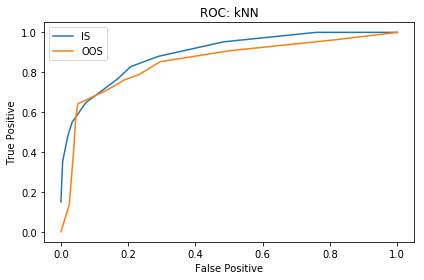

In [7]:
modelKNN = mdl.KNN(scale=True, n_neighbors=10, weights='uniform')
modelKNN.fit(data)
modelKNN.predict(dataT)
modelKNN.printSummary()
modelKNN.plotROC()

###KNN CV

****** KNN CV ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41

-----Best k-----
k = 10 with the score = 0.79



-----Performance-----
accuracy	 (IS / CV / OOS): 0.82 / 0.79 / 0.80
accproba	 (IS / CV / OOS): 0.75 / 0.72 / 0.73
logproba	 (IS / CV / OOS): -0.38 / -1.63 / -1.40
aucproba	 (IS / CV / OOS): 0.89 / 0.84 / 0.85
recall	 (IS / CV / OOS): 0.65 / 0.65 / 0.71
precision	 (IS / CV / OOS): 0.84 / 0.78 / 0.79

-----Confusion (IS)-----
   0-pred  1-pred
0    0.58    0.05
1    0.13    0.24
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.51    0.08
1    0.12    0.29



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


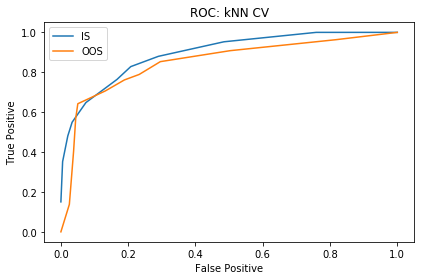

In [8]:
modelKNNCV = mdl.KNNCV(scale=True, weights='uniform')
modelKNNCV.fit(data)
modelKNNCV.predict(dataT)
modelKNNCV.printSummary()
modelKNNCV.plotROC()

###Decision Trees

****** DECISION TREE ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41

-----Feature Importance-----
Pclass      0.08
Age         0.12
Fare        0.13
EmbarkedC   0.00
EmbarkedS   0.00
Female      0.68
SibSpYes    0.00
ParchYes    0.00
dtype: float64

-----Performance-----
accuracy	 (IS / CV / OOS): 0.82 / 0.77 / 0.83
accproba	 (IS / CV / OOS): 0.72 / 0.70 / 0.73
logproba	 (IS / CV / OOS): -0.43 / -0.62 / -0.54
aucproba	 (IS / CV / OOS): 0.87 / 0.85 / 0.86
recall	 (IS / CV / OOS): 0.70 / 0.74 / 0.74
precision	 (IS / CV / OOS): 0.80 / 0.70 / 0.82

-----Confusion (IS)-----
   0-pred  1-pred
0    0.56    0.07
1    0.11    0.26
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.53    0.07
1    0.10    0.30



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


InvocationException: GraphViz's executables not found

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


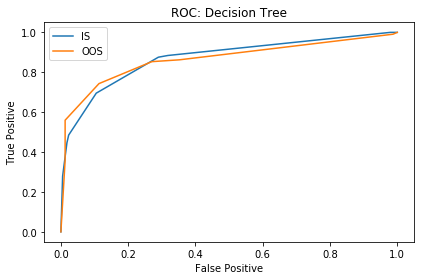

In [10]:
modelTree = mdl.Tree(scale=True, max_depth=3, class_weight='balanced', random_state=1)
modelTree.fit(data)
modelTree.predict(dataT)
modelTree.printSummary()
modelTree.plotROC()
modelTree.visualizeTree()

###Decision Trees CV

****** TREE CV ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41

-----Best Parameters-----
max_depth = 3 and max_leaf_nodes = 6 with the score = 0.81

-----Feature Importance-----
Pclass      0.08
Age         0.10
Fare        0.13
EmbarkedC   0.00
EmbarkedS   0.00
Female      0.69
SibSpYes    0.00
ParchYes    0.00
dtype: float64



-----Performance-----
accuracy	 (IS / CV / OOS): 0.82 / 0.79 / 0.83
accproba	 (IS / CV / OOS): 0.72 / 0.69 / 0.73
logproba	 (IS / CV / OOS): -0.43 / -0.48 / -0.41
aucproba	 (IS / CV / OOS): 0.86 / 0.84 / 0.87
recall	 (IS / CV / OOS): 0.70 / 0.71 / 0.74
precision	 (IS / CV / OOS): 0.80 / 0.74 / 0.82

-----Confusion (IS)-----
   0-pred  1-pred
0    0.56    0.07
1    0.11    0.26
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.53    0.07
1    0.10    0.30



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


InvocationException: GraphViz's executables not found

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


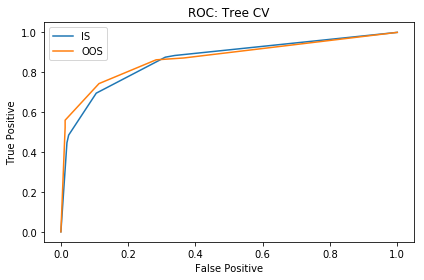

In [11]:
modelTreeCV = mdl.TreeCV(scale=True, class_weight='balanced', random_state=1)
modelTreeCV.fit(data)
modelTreeCV.predict(dataT)
modelTreeCV.printSummary()
modelTreeCV.plotROC()
modelTreeCV.visualizeTree()

###Random Forests

****** RANDOM FOREST ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41

-----Feature Importance-----
Pclass      0.09
Age         0.14
Fare        0.20
EmbarkedC   0.01
EmbarkedS   0.01
Female      0.54
SibSpYes    0.01
ParchYes    0.00
dtype: float64



-----Performance-----
accuracy	 (IS / CV / OOS): 0.87 / 0.79 / 0.84
accproba	 (IS / CV / OOS): 0.75 / 0.72 / 0.75
logproba	 (IS / CV / OOS): -0.37 / -0.45 / -0.39
aucproba	 (IS / CV / OOS): 0.92 / 0.86 / 0.88
recall	 (IS / CV / OOS): 0.84 / 0.73 / 0.79
precision	 (IS / CV / OOS): 0.82 / 0.73 / 0.81

-----Confusion (IS)-----
   0-pred  1-pred
0    0.56    0.07
1    0.06    0.31
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.52    0.07
1    0.09    0.32



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


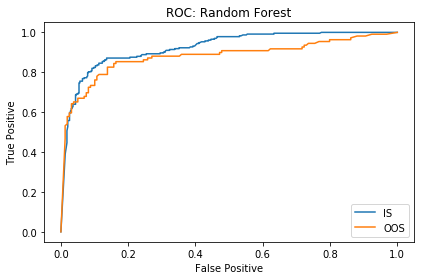

In [12]:
modelRandomForest = mdl.RandomForest(scale=True, n_estimators=128, max_features=None,
                                     max_depth=None, max_leaf_nodes=16, class_weight='balanced', random_state=1)
modelRandomForest.fit(data)
modelRandomForest.predict(dataT)
modelRandomForest.printSummary()
modelRandomForest.plotROC()


###Boosted Trees

****** BOOSTED TREE ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41

-----Feature Importance-----
Pclass      0.07
Age         0.35
Fare        0.42
EmbarkedC   0.00
EmbarkedS   0.02
Female      0.08
SibSpYes    0.03
ParchYes    0.02
dtype: float64



-----Performance-----
accuracy	 (IS / CV / OOS): 0.89 / 0.80 / 0.84
accproba	 (IS / CV / OOS): 0.77 / 0.72 / 0.74
logproba	 (IS / CV / OOS): -0.31 / -0.48 / -0.41
aucproba	 (IS / CV / OOS): 0.94 / 0.84 / 0.89
recall	 (IS / CV / OOS): 0.86 / 0.75 / 0.83
precision	 (IS / CV / OOS): 0.84 / 0.72 / 0.78

-----Confusion (IS)-----
   0-pred  1-pred
0    0.56    0.06
1    0.05    0.32
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.50    0.09
1    0.07    0.34



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


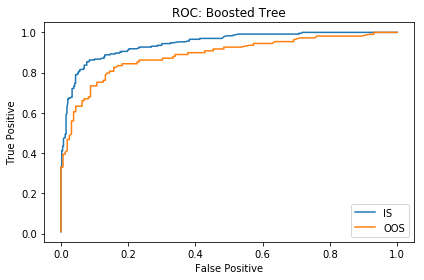

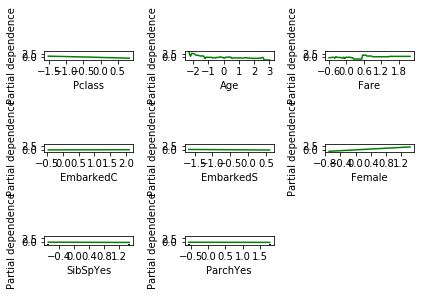

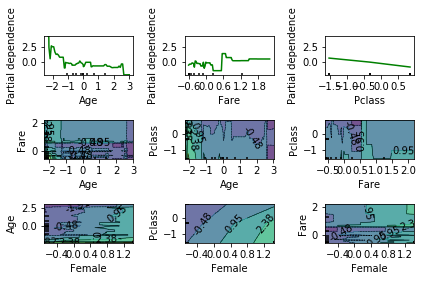

In [13]:
modelBoostedTree = mdl.BoostedTree(scale=True, n_estimators=256, loss='deviance', learning_rate=0.1, subsample=1.,
                                   max_features=None, max_depth=2, max_leaf_nodes=None, random_state=1,
                                   balanceWeights=True)
modelBoostedTree.fit(data)
modelBoostedTree.predict(dataT)
modelBoostedTree.printSummary()
modelBoostedTree.plotROC()
modelBoostedTree.plotPartialDependence(features=None)
modelBoostedTree.plotPartialDependence(features=('Age', 'Fare', 'Pclass', 
                                                 ('Age','Fare'),('Age','Pclass'),('Fare','Pclass'),
                                                 ('Female', 'Age'), ('Female','Pclass'),('Female','Fare')))

###Boosted Trees (XGBoost) - UNDER CONSTRUCTION

In [5]:
# modelBoostedTreeXG = mdl.BoostedTreeXGBoost(scale=True, n_estimators=128, loss='deviance', learning_rate=1.,
#                                             max_features=None, max_depth=2, max_leaf_nodes=None, random_state=1,
#                                             balanceWeights=True)
# modelBoostedTreeXG.fit(data)
# modelBoostedTreeXG.predict(dataT)
# modelBoostedTreeXG.printSummary()
# modelBoostedTreeXG.plotROC()
